In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [10]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [11]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [12]:
x_train = tf.expand_dims(x_train, axis = 3,name = None)
x_test = tf.expand_dims(x_test, axis = 3,name = None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [13]:
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         4

In [15]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 34s 37ms/step - loss: 1.6824 - accuracy: 0.3766 - val_loss: 0.4273 - val_accuracy: 0.8825
Epoch 2/40
907/907 [==============================] - 33s 36ms/step - loss: 0.4387 - accuracy: 0.8610 - val_loss: 0.2740 - val_accuracy: 0.9215
Epoch 3/40
907/907 [==============================] - 33s 36ms/step - loss: 0.3259 - accuracy: 0.8982 - val_loss: 0.2067 - val_accuracy: 0.9380
Epoch 4/40
907/907 [==============================] - 32s 35ms/step - loss: 0.2742 - accuracy: 0.9141 - val_loss: 0.1822 - val_accuracy: 0.9515
Epoch 5/40
907/907 [==============================] - 31s 35ms/step - loss: 0.2380 - accuracy: 0.9246 - val_loss: 0.2735 - val_accuracy: 0.9160
Epoch 6/40
907/907 [==============================] - 32s 35ms/step - loss: 0.2226 - accuracy: 0.9293 - val_loss: 0.1598 - val_accuracy: 0.9535
Epoch 7/40
907/907 [==============================] - 31s 35ms/step - loss: 0.1958 - accuracy: 0.9378 - val_loss: 0.1623 - val_accuracy:

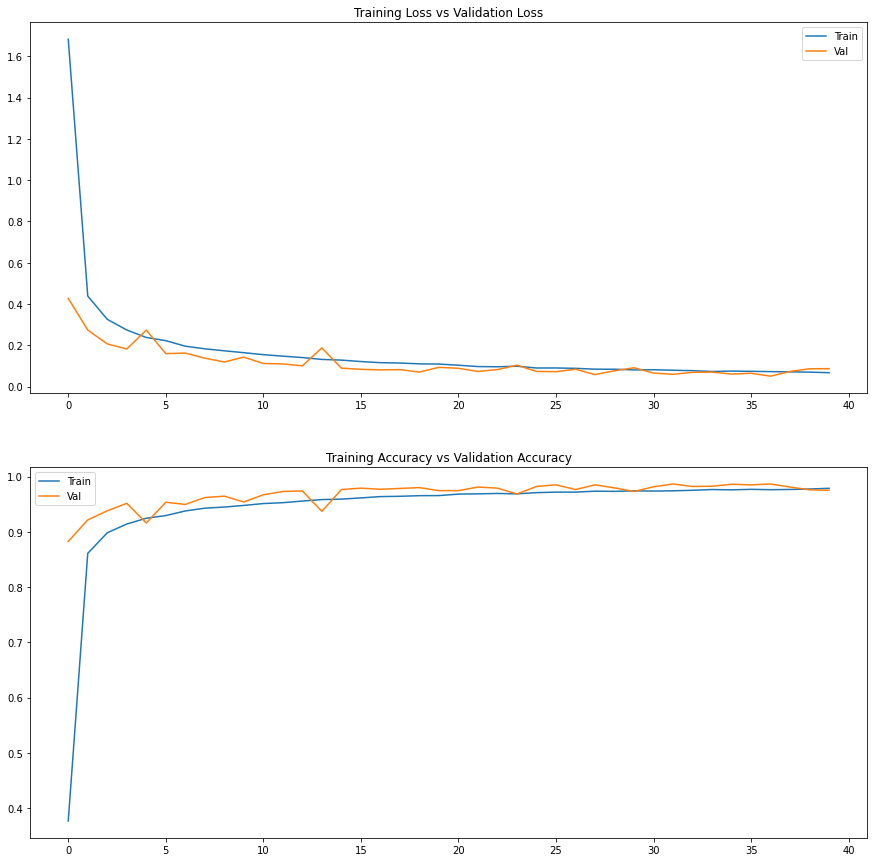

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss']) 
axs[0].plot(history.history['val_loss']) 
axs[0].title.set_text('Training Loss vs Validation Loss') 
axs[0].legend(['Train', 'Val'])  
axs[1].plot(history.history['accuracy']) 
axs[1].plot(history.history['val_accuracy']) 
axs[1].title.set_text('Training Accuracy vs Validation Accuracy') 
axs[1].legend(['Train', 'Val'])

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.1159 - accuracy: 0.9650


[0.11586444079875946, 0.9649999737739563]